# Deskripsi Proyek 

Perusahaan tambang minyak bernama OilyGiant. Tugas pertama kita adalah menemukan lokasi yang cocok untuk penggalian sumur minyak baru.
Berikut adalah langkah-langkah untuk memilih lokasi baru:
1. Kumpulkan parameter untuk membangun sumur minyak di beberapa wilayah terpilih: kualitas minyak dan volume cadangan minyak;
2. Buatlah sebuah model yang mampu memprediksi volume cadangan minyak di sumur yang baru;
3. Pilihlah sumur minyak dengan nilai estimasi tertinggi;
4. Pilihlah wilayah dengan total laba tertinggi untuk sumur minyak terpilih.


Kita memiliki data sampel minyak dari tiga wilayah. Parameter setiap sumur minyak di wilayah tersebut sudah diketahui. Buatlah sebuah model yang akan membantu Anda memilih wilayah dengan margin laba tertinggi. Lakukan analisis terhadap laba dan risiko potensial menggunakan teknik bootstrapping.

# Deskripsi Data: 

Data eksplorasi geologi untuk ketiga wilayah tersebut disimpan dalam beberapa file:
1. geo_data_0.csv. unduh dataset
2. geo_data_1.csv. unduh dataset
3. geo_data_2.csv. unduh dataset
4. id — ID unik sumur minyak
5. f0, f1, f2 — tiga fitur titik (makna spesifiknya tidak penting, tetapi fitur itu sendiri signifikan)
6. product — volume cadangan minyak di sumur (ribuan barel).

## Mengunduh, Memersiapkan dan Mempelajari  Dataset.

In [1]:
# import pandas and numpy untuk proses dan manipulasi data
import numpy as np
import pandas as pd
from scipy import stats as st

# Import seaborn & matplotlib untuk data visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import train_test_split untuk membagi data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
pd.options.mode.chained_assignment = None #menghilangkan notif CopyWarning

# import modul machine learning dari library sklearn
from sklearn.linear_model import LinearRegression

# import regression metrics
from sklearn.metrics import explained_variance_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# import warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# Membuat Fungsi untuk menentukan jika ada columns yang memiliki nilai yang hilang
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} dengan {:.{}%} persentasi nilai yang hilang , dan {} nilai yang hilang'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'Terdapat {} columns dengan nilai NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'Tidak Terdapat columns dengan nilai NA.' + "\033[0m")
        
# Fungsi untuk melihat informasi keseluruhan pada dataset 
def get_info(df):
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns dengan nilai yang hilang:')
    display(get_percent_of_na(df, 4))  
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'Kita mempunyai {} baris yang terduplikasi.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [4]:
# mempelajari informasi umum pada keseluruhan dataset  
print('Informasi Umum pada Dataset geo_data_0')
get_info(geo_data_0)


Informasi Umum pada Dataset geo_data_0
----------------------------------------------------------------------------------------------------
Head:



,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


----------------------------------------------------------------------------------------------------


,id
count,100000
unique,99990
top,AGS9W
freq,2



Columns dengan nilai yang hilang:

Tidak Terdapat columns dengan nilai NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(100000, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
Kita mempunyai 0 baris yang terduplikasi.




In [5]:
# mempelajari informasi umum pada keseluruhan dataset  
print('Informasi Umum pada Dataset geo_data_1')
get_info(geo_data_1)


Informasi Umum pada Dataset geo_data_1
----------------------------------------------------------------------------------------------------
Head:



,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


----------------------------------------------------------------------------------------------------


,id
count,100000
unique,99996
top,5ltQ6
freq,2



Columns dengan nilai yang hilang:

Tidak Terdapat columns dengan nilai NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(100000, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
Kita mempunyai 0 baris yang terduplikasi.




In [6]:
# mempelajari informasi umum pada keseluruhan dataset  
print('Informasi Umum pada Dataset geo_data_2')
get_info(geo_data_2)


Informasi Umum pada Dataset geo_data_2
----------------------------------------------------------------------------------------------------
Head:



,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

----------------------------------------------------------------------------------------------------
Describe:



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


----------------------------------------------------------------------------------------------------


,id
count,100000
unique,99996
top,Vcm5J
freq,2



Columns dengan nilai yang hilang:

Tidak Terdapat columns dengan nilai NA.


None

----------------------------------------------------------------------------------------------------
Shape:
(100000, 5)
----------------------------------------------------------------------------------------------------
Duplicated:
Kita mempunyai 0 baris yang terduplikasi.




Kesimpulan : 

Dari informasi keseluruhan dataset, kita memiliki panjang 1000 data dan 5 baris column, tidak terdapat nilai yang hilang pada dataset dan tidak terdapat nilai yang terduplikasi pada dataset. 


In [7]:
# memeriksa korelasi setiap variabel pada setiap wilayah
def pairplot(df):    
    cols = ['f0', 'f1', 'f2', 'product']
    ax = sns.pairplot(df, vars=cols)
    ax.fig.suptitle('Hubungan Setiap variabel pada Eksplorasi Geologi Dataset', y=1.02);
    
# fungsi untuk plot matrix korelasi pada setiap geologi data
def corr_matrix(df, label):
    plt.figure(figsize=(8,6))
    corrMatrix = df.corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.title('Correlation matrix untuk ' + label)
    plt.show()            

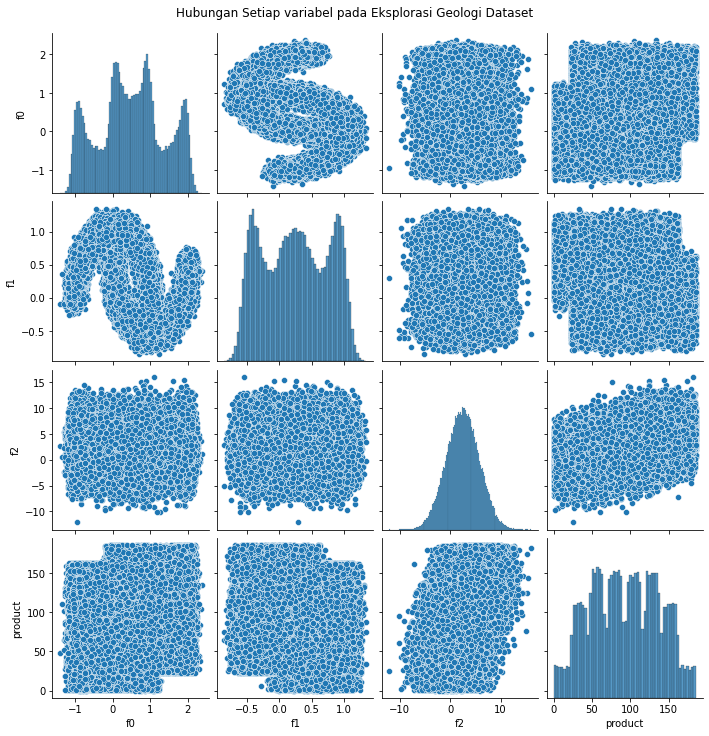

In [8]:
# pairplot pada dataset geo_0
pairplot(geo_data_0)

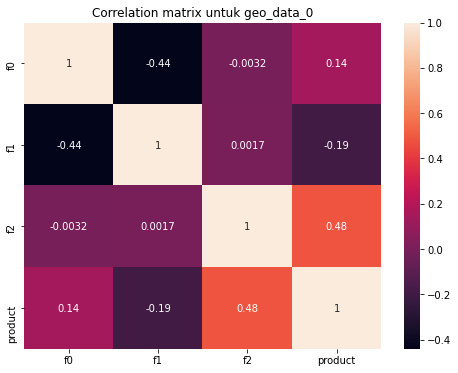

In [9]:
# correlation matrix pada dataset geo_0
corr_matrix(geo_data_0, 'geo_data_0')

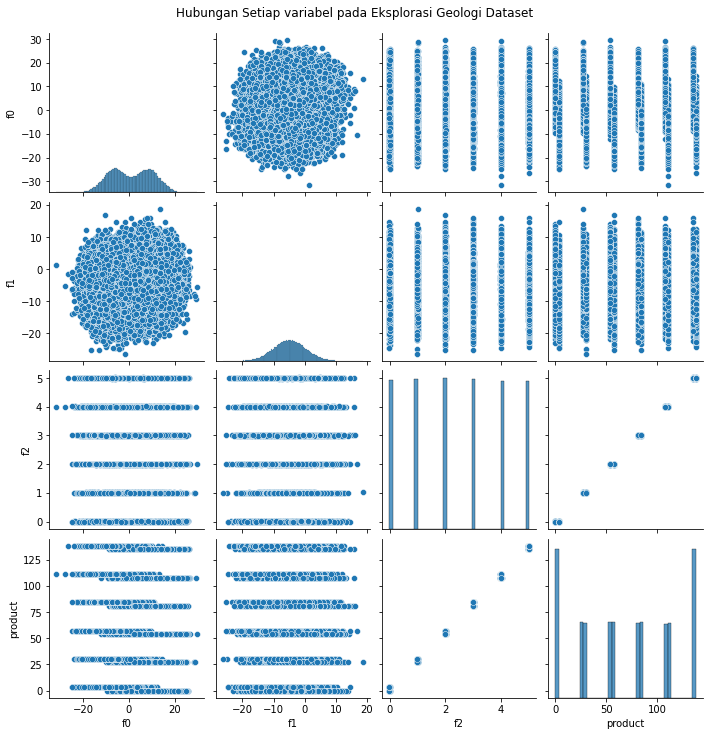

In [10]:
# pairplot pada dataset geo_1
pairplot(geo_data_1)

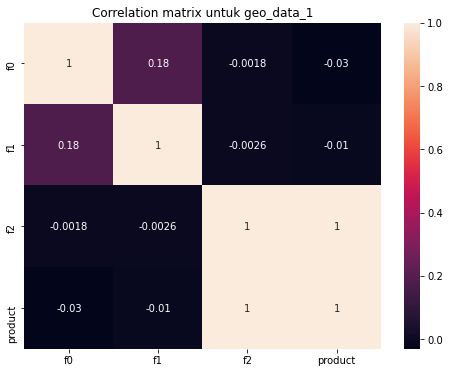

In [11]:
# correlation matrix pada dataset geo_1
corr_matrix(geo_data_1, 'geo_data_1')

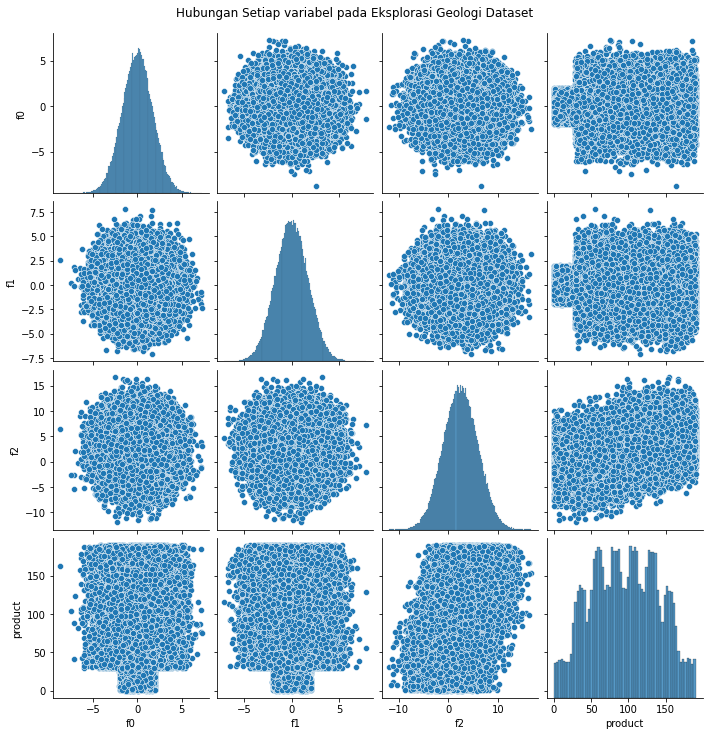

In [12]:
# pairplot pada dataset geo_2
pairplot(geo_data_2)

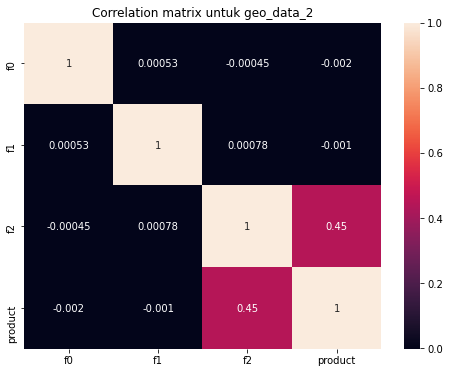

In [13]:
# correlation matrix pada dataset geo_2
corr_matrix(geo_data_2, 'geo_data_2')

Kesimpulan :

Pada tahap ini kita memplot menggunakan pairplot dan correlation matrix pada setiap wilayah untuk mengamati hubungan variabel features ke target (product), pada setiap wilayah dan didapati :
1. Pada Wilayah 0, f2 mempunyai angka korelasi yang tinggi ke target(product) sebesar 0.48.
2. Pada Wilayah 1, f2 mempunyai angka korelasi yang tinggi ke target(product) sebesar 1.
3. Pada Wilayah 2, f2 mempunyai angka korelasi yang tinggi ke target(product) sebesar 0.45.


## Melatih dan menguji model untuk setiap wilayah:
1. Memisahkan data menjadi training set dan validation set dengan rasio 75:25.
2. melatih model dan memprediksi pada validation set.
3. Menyimpan prediksi dan jawaban yang benar pada validation set.
4. Mampilkan volume rata-rata cadangan minyak yang diprediksi dan model RMSE.
5. Menganalisa Hasil.

In [14]:
# Fungsi untuk melatih model dan memprediksi 
def train_valid_predict(df):
    
    # menghapus variable features yang tidak penting
    df = df.drop(['id'], axis=1)

    # menentukan variable pada features dan target
    target = df['product']
    features = df.drop(['product'], axis=1)

    # memisahkan data pada 75% training set dan 25% valid test 
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    # menstandarkan data numerik dengan features scaling 
    scaler = StandardScaler()
    scaler.fit(features_train)
    
    # mengubah train set dan valid set menggunggunakan transform()
    features_train = scaler.transform(features_train)
    features_valid  = scaler.transform(features_valid)

    # linear regression model
    model = LinearRegression()
    model.fit(features_train, target_train) # train model
    valid_predictions = pd.Series(model.predict(features_valid), index=target_valid.index) # membuat prediksi untuk valid set
    return valid_predictions, target_valid
  

In [15]:
# fungsi untuk menghitung regression metrics
def reg_metrics(y_valid, y_pred):
    print('Mean absolute error: %.2f' % mean_absolute_error(y_valid, y_pred))
    print('Mean squared error: %.3f' % mean_squared_error(y_valid, y_pred))
    print("RMSE: %.4f" % np.sqrt(mean_squared_error(y_valid, y_pred)))
    print('Variance score: %.4f' % r2_score(y_valid, y_pred)) # koefesien determinasi
    print('-'*30)
    # volume rata-rata cadangan minyak yang diprediksi
    print('Hasil volume rata-rata cadangan minyak yang diprediksi dan Hasil Cadangan minyak yang didapat secara aktual :')
    print('Volume rata-rata cadangan minyak yang didapat aktual : %.2f' % y_valid.mean())
    print('Volume rata-rata cadangan minyak yang diprediksi     : %.2f' % y_pred.mean())
    print("RMSE dari Model : %.4f" % np.sqrt(mean_squared_error(y_valid, y_pred)))

### Melatih  & Memprediksi Dataset region_0 

In [16]:
# melatih model dan memprediksi valid set 
valid_predictions_0, valid_test_0 = train_valid_predict(geo_data_0)

# menghitung & menampilkan score regression metric
reg_metrics(valid_predictions_0, valid_test_0)


Mean absolute error: 30.92
Mean squared error: 1412.213
RMSE: 37.5794
Variance score: -1.6291
------------------------------
Hasil volume rata-rata cadangan minyak yang diprediksi dan Hasil Cadangan minyak yang didapat secara aktual :
Volume rata-rata cadangan minyak yang didapat aktual : 92.59
Volume rata-rata cadangan minyak yang diprediksi     : 92.08
RMSE dari Model : 37.5794


### Melatih  & Memprediksi Dataset region_1

In [17]:
# melatih model dan memprediksi valid set 
valid_predictions_1, valid_test_1 = train_valid_predict(geo_data_1)

# menghitung & menampilkan score regression metric
reg_metrics(valid_predictions_1, valid_test_1)

Mean absolute error: 0.72
Mean squared error: 0.798
RMSE: 0.8931
Variance score: 0.9996
------------------------------
Hasil volume rata-rata cadangan minyak yang diprediksi dan Hasil Cadangan minyak yang didapat secara aktual :
Volume rata-rata cadangan minyak yang didapat aktual : 68.73
Volume rata-rata cadangan minyak yang diprediksi     : 68.72
RMSE dari Model : 0.8931


### Melatih  & Memprediksi Dataset region_2

In [18]:
# melatih model dan memprediksi valid set 
valid_predictions_2, valid_test_2 = train_valid_predict(geo_data_2)

# menghitung & menampilkan score regression metric
reg_metrics(valid_predictions_2, valid_test_2)

Mean absolute error: 32.79
Mean squared error: 1602.378
RMSE: 40.0297
Variance score: -3.0653
------------------------------
Hasil volume rata-rata cadangan minyak yang diprediksi dan Hasil Cadangan minyak yang didapat secara aktual :
Volume rata-rata cadangan minyak yang didapat aktual : 94.97
Volume rata-rata cadangan minyak yang diprediksi     : 94.88
RMSE dari Model : 40.0297


In [19]:
# Hasil Prediksi
print('Hasil prediksi dari analisis rata-rata cadangan minyak yang diprediksi dan model RMSE.')
print('-'*30)
print('Analisis Prediksi Region 0')
print('-'*30)
reg_metrics(valid_predictions_0, valid_test_0)
print('-'*30)
print('Analisis Prediksi Region 1')
print('-'*30)
reg_metrics(valid_predictions_1, valid_test_1)
print('-'*30)
print('Analisis Prediksi Region 2')
print('-'*30)
reg_metrics(valid_predictions_2, valid_test_2)

Hasil prediksi dari analisis rata-rata cadangan minyak yang diprediksi dan model RMSE.
------------------------------
Analisis Prediksi Region 0
------------------------------
Mean absolute error: 30.92
Mean squared error: 1412.213
RMSE: 37.5794
Variance score: -1.6291
------------------------------
Hasil volume rata-rata cadangan minyak yang diprediksi dan Hasil Cadangan minyak yang didapat secara aktual :
Volume rata-rata cadangan minyak yang didapat aktual : 92.59
Volume rata-rata cadangan minyak yang diprediksi     : 92.08
RMSE dari Model : 37.5794
------------------------------
Analisis Prediksi Region 1
------------------------------
Mean absolute error: 0.72
Mean squared error: 0.798
RMSE: 0.8931
Variance score: 0.9996
------------------------------
Hasil volume rata-rata cadangan minyak yang diprediksi dan Hasil Cadangan minyak yang didapat secara aktual :
Volume rata-rata cadangan minyak yang didapat aktual : 68.73
Volume rata-rata cadangan minyak yang diprediksi     : 68.72
R

Kesimpulan :

Dari hasil analisis prediksi volume rata-rata cadangan minyak, dengan meggunakan metrik regresi didapati hasil :

1. pada region 0 dengan variance score -1.6291 yang berarti kualitasi model rendah, dengan mean error untuk setiap sumur adalah 30.92 ribu barrel, dan nilai RMSE yang tinggi sebesar 37.57 ribu barrel. 
-------
2. pada region 1 dengan variance score 0.9996 dimana model ini menunjukkan kualitas model yang baik. sementara nilai rata-rata errornya yang rendah sebesar 0.72 ribu barrel dimana model ini memprediksi kesalahan yang rendah pada wilayah ini. sementara untuk RMSE pada setiap sumur sebesar 0.89 ribu barrel dimana model memprediksi volume rata-rata minyak yang mendekati cadangan yang sebenarnya.
-------
3. Pada region 2 dengan variance score yang sangat rendah sebesar -3.06 dimana model ini menunjukkan kualitas mode yang sangat buruk pada wilayah ini. dengan nilai rata-rata erros yang tinggi sebesar 32.79 ribu barrel dan nilai RMSE yang tinggi sebesar 40.02 ribu barrl dengan identifikasi overprediksi pada rata-rata nilai cadangan minyak di wilayah ini.

## Menghitung Laba 

### menyimpan semua nilai kunci untuk perhitungan laba pada variabel-variabel terpisah

In [20]:
# menentukan laba 
titik_ekplor_sumur = 500 # 500 titik sumur minyak 
titik_sumur_terbaik = 200 # 200 titik sumur minyak terbaik 
biaya_modal = 100 * 10**6 # anggaran pengembangan sumur minyak untuk 200 titik (100 Milliar USD)
biaya_per_barel = 4.5 # Satu barel bahan mentah menghasilkan 4,5 USD pendapatan. Pendapatan dari satu unit produk adalah 4.500 dolar (volume cadangan minyak dalam ribuan barel). 
resiko_kerugian = 0.025 #risiko kerugian lebih rendah dari 2,5%.

###  Menghitung volume cadangan minyak yang mencukupi untuk mengembangkan sumur baru tanpa kerugian

In [21]:
# menghitung volume cadangan minyak untuk pengembangan
pendapatan = biaya_per_barel * titik_sumur_terbaik 
volume_cadangan = biaya_modal / pendapatan
print('Volume cadangan minyak yang didapat untuk mengembangkan sumur minyak yang baru tanpa kerugian : {:.2f} %,  Cadangan Minyak per Barel'.format(volume_cadangan))


Volume cadangan minyak yang didapat untuk mengembangkan sumur minyak yang baru tanpa kerugian : 111111.11 %,  Cadangan Minyak per Barel


Kesimpulan :

Setelah menghitung volume cadangan minyak untuk mengembangkan sumur baru tanpa kerugian, didapati jumlah 111,11 ribu barel, volume cadangan ini akan dijadikan dasar untuk memilih wilayah pengeboran minyak. ika dibandingkan dengan rata-rata volume cadangan di masing-masing wilayah, terlihat bahwa rata-rata volume cadangan di setiap wilayah lebih rendah dari 111,11 ribu barel.


## Membuat sebuah fungsi untuk menghitung profit dari kumpulan sumur minyak terpilih dan prediksi model :

In [22]:
# fungsi untuk menghitung profit tertinggi pada setiap wilayah
def prediksi_tertinggi(y_test, y_pred, count):
    volume_cadangan_prediksi_tertinggi = y_pred.sort_values(ascending=False)
    volume_cadangan_target = y_test[volume_cadangan_prediksi_tertinggi.index][:count]
    total_volume_cadangan_target = volume_cadangan_target.sum() * 1000
    print('Nilai prediksi tertinggi perhitungan profit pada wilayah ini adalah: sebesar %.2f' % (total_volume_cadangan_target / 10**6),'Juta Barel')


In [23]:
# fungsi untuk menghitung profit dari sumur terbaik dan prediksi model 
def cadangan_profit(y_test, y_pred, count):
    volume_cadangan_prediksi_tertinggi = y_pred.sort_values(ascending=False)
    volume_cadangan_target = y_test[ volume_cadangan_prediksi_tertinggi.index][:count]
    total_volume_cadangan_target = volume_cadangan_target.sum() * 1000
    cadangan_profit_terpilih = total_volume_cadangan_target * biaya_per_barel - biaya_modal
    print('Profit yang di dapat: %.2f' % cadangan_profit_terpilih,'USD')

### Memilih sumur dengan nilai prediksi tertinggi

Pada Tahap ini kita akan melihat nilai prediksi tertinggi pada setiap wilayah

### Region 0 

In [24]:
print('Wilayah dengan nilai prediksi tertinggi')
prediksi_tertinggi(valid_test_0, valid_predictions_0, 200)
print('-'*30)
print('Profit untuk volume cadangan yang diperoleh di setiap wilayah')
cadangan_profit(valid_test_0, valid_predictions_0, 200)


Wilayah dengan nilai prediksi tertinggi
Nilai prediksi tertinggi perhitungan profit pada wilayah ini adalah: sebesar 29.60 Juta Barel
------------------------------
Profit untuk volume cadangan yang diperoleh di setiap wilayah
Profit yang di dapat: 33208260.43 USD


### Region 1

In [25]:
print('Wilayah dengan nilai prediksi tertinggi')
prediksi_tertinggi(valid_test_1, valid_predictions_1, 200)
print('-'*30)
print('Profit untuk volume cadangan yang diperoleh di setiap wilayah')
cadangan_profit(valid_test_1, valid_predictions_1, 200)


Wilayah dengan nilai prediksi tertinggi
Nilai prediksi tertinggi perhitungan profit pada wilayah ini adalah: sebesar 27.59 Juta Barel
------------------------------
Profit untuk volume cadangan yang diperoleh di setiap wilayah
Profit yang di dapat: 24150866.97 USD


### Region 2

In [26]:
print('Wilayah dengan nilai prediksi tertinggi')
prediksi_tertinggi(valid_test_2, valid_predictions_2, 200)
print('-'*30)
print('Profit untuk volume cadangan yang diperoleh di setiap wilayah')
cadangan_profit(valid_test_2, valid_predictions_2, 200)


Wilayah dengan nilai prediksi tertinggi
Nilai prediksi tertinggi perhitungan profit pada wilayah ini adalah: sebesar 28.25 Juta Barel
------------------------------
Profit untuk volume cadangan yang diperoleh di setiap wilayah
Profit yang di dapat: 27103499.64 USD


Kesimpulan :

1. Dari perhitungan nilai prediksi tertinggi, terlihat bahwa Region 0 memiliki prediksi tertinggi dari ketiga  tersebut yakni sebesar 29.60 Juta barel. 

2. Dari hasil perhitungan Profit tertinggi dapat dilihat terdapat pada Region 0 sebesar 33 Milar USD, kita dapat merekomendasi perushaan untuk pengeboran minyak pada wilayah ini.

## Menghitunglah risiko dan laba untuk setiap wilayah:

### Menggunakan teknik  bootstrapping dengan 1.000 sampel untuk menemukan distribusi labanya.

In [32]:
# fungsi untuk menghitung distribusi profit  
def pendapatan(y_test, y_pred, count):
    volume_cadangan_prediksi_tertinggi = y_pred.sort_values(ascending=False)
    volume_cadangan_target = y_test[ volume_cadangan_prediksi_tertinggi.index][:count]
    total_volume_cadangan_target = volume_cadangan_target.sum() * 1000
    cadangan_profit_terpilih = total_volume_cadangan_target * biaya_per_barel - biaya_modal
    return cadangan_profit_terpilih

# Menghitung profit pendapatan dengan teknik bootstraping menggunakan 1000 sample
def pendapatan_bootstraping(y_test, y_pred):
    state= np.random.RandomState(12345)
    
    # Menyimpan nilai kuantil 99% ke variabel laba 
    profit = []
    for i in range(1000):
        target_subsample = y_test.sample(n=titik_ekplor_sumur, replace=True, random_state=state)
        predicted_subsample = y_pred[target_subsample.index]
        profit.append(pendapatan(target_subsample, predicted_subsample, titik_sumur_terbaik))
    return pd.Series(profit)

# Menghitung profit bootstraping dengan probabilitas kerugian yang mungkin dialami
def bootstrap_profit_risk(y_test, y_pred):
    profit = pendapatan_bootstraping(y_test, y_pred)
    mean_profit = profit.mean() # rata-rata profit
    selang_kepercayaan_interval = st.t.interval(
        0.95, len(profit)-1, mean_profit, profit.sem()) # 95% Confidence interval
    kerugian = profit[profit < 0]
    resiko_kerugian = len(kerugian) / len(profit)
    print('Rata-rata Profit       : %.2f' % mean_profit)
    print('95% Selang Kepercayaan :',selang_kepercayaan_interval )
    print('Resiko Kerugian        : {:.2%}'.format(resiko_kerugian))



### Profit Rata-Rata, 95% Selang Kepercayaan dan penentuan risiko kerugian di masing-masing wilayah & Distribusi Profit Menggunakan Teknik Bootstraping

Profit Rata-Rata, 95% Selang Kepercayaan dan penentuan risiko kerugian di masing-masing wilayah
Region_0
------------------------------
Rata-rata Profit       : 4259385.27
95% Selang Kepercayaan : (4087322.0706869857, 4431448.467524861)
Resiko Kerugian        : 6.00%
None
------------------------------
Region_1
------------------------------
Rata-rata Profit       : 5152227.73
95% Selang Kepercayaan : (5016214.761763217, 5288240.70710258)
Resiko Kerugian        : 1.00%
None
------------------------------
Region_2
------------------------------
Rata-rata Profit       : 4350083.63
95% Selang Kepercayaan : (4174535.520413578, 4525631.735241534)
Resiko Kerugian        : 6.40%
None
------------------------------


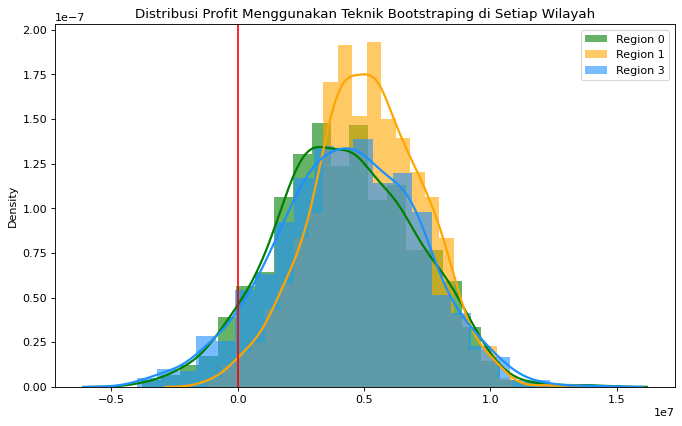

In [33]:
# Profit dari setiap wilayah
region_0_profit = pendapatan_bootstraping(valid_test_0, valid_predictions_0)
region_1_profit = pendapatan_bootstraping(valid_test_1, valid_predictions_1)
region_2_profit = pendapatan_bootstraping(valid_test_2, valid_predictions_2)

# Plot Distribusi 
kwargs = dict(hist_kws={'alpha': 0.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,6), dpi= 80)
sns.distplot(region_0_profit, color='green', label='Region 0', **kwargs)
sns.distplot(region_1_profit, color='orange', label='Region 1', **kwargs)
sns.distplot(region_2_profit, color='dodgerblue', label='Region 3', **kwargs)
plt.axvline(0, c="r")
plt.title('Distribusi Profit Menggunakan Teknik Bootstraping di Setiap Wilayah')
plt.legend();

print('Profit Rata-Rata, 95% Selang Kepercayaan dan penentuan risiko kerugian di masing-masing wilayah')
print('Region_0')
print('-'*30)
print(bootstrap_profit_risk(valid_test_0, valid_predictions_0))
print('-'*30)
print('Region_1')
print('-'*30)
print(bootstrap_profit_risk(valid_test_1, valid_predictions_1))
print('-'*30)
print('Region_2')
print('-'*30)
print(bootstrap_profit_risk(valid_test_2, valid_predictions_2))
print('-'*30)

Kesimpulan :
Dari Penggunaan teknik bootstrapping untuk menghitung resiko dan profit dari setiap wilayah, dapat diamati bahwa Region_1 memiliki distribusi keuntungan tertinggi dibandingkan wilayah lainnya. dan juga setelaha menghitung profit dari rata-ratanya bahwa region 1 mememiliki rata-rata tertinggi dan resiko kerugian yang terendah.

## Kesimpulan Akhir :



1. Dari informasi keseluruhan dataset, kita memiliki panjang 1000 data dan 5 baris column, tidak terdapat nilai yang hilang pada dataset dan tidak terdapat nilai yang terduplikasi pada dataset.
_____
2. Pada tahap ini kita memplot menggunakan pairplot dan correlation matrix pada setiap wilayah untuk mengamati hubungan variabel features ke target (product), pada setiap wilayah dan didapati :
a. Pada Wilayah 0, f2 mempunyai angka korelasi yang tinggi ke target(product) sebesar 0.48.
b. Pada Wilayah 1, f2 mempunyai angka korelasi yang tinggi ke target(product) sebesar 1.
c. Pada Wilayah 2, f2 mempunyai angka korelasi yang tinggi ke target(product) sebesar 0.45.
_____
3. Memisahkan data menjadi training set dan validation set dengan rasio 75:25.
a. melatih model dan memprediksi pada validation set.
b. Menyimpan prediksi dan jawaban yang benar pada validation set.
c. Mampilkan volume rata-rata cadangan minyak yang diprediksi dan model RMSE.
d. Menganalisa Hasil :
Pada region 0 dengan variance score -1.6291 yang berarti kualitasi model rendah, dengan mean error untuk setiap sumur adalah 30.92 ribu barrel, dan nilai RMSE yang tinggi sebesar 37.57 ribu barrel.
pada region 1 dengan variance score 0.9996 dimana model ini menunjukkan kualitas model yang baik. sementara nilai rata-rata errornya yang rendah sebesar 0.72 ribu barrel dimana model ini memprediksi kesalahan yang rendah pada wilayah ini. sementara untuk RMSE pada setiap sumur sebesar 0.89 ribu barrel dimana model memprediksi volume rata-rata minyak yang mendekati cadangan yang sebenarnya.
Pada region 2 dengan variance score yang sangat rendah sebesar -3.06 dimana model ini menunjukkan kualitas mode yang sangat buruk pada wilayah ini. dengan nilai rata-rata erros yang tinggi sebesar 32.79 ribu barrel dan nilai RMSE yang tinggi sebesar 40.02 ribu barrl dengan identifikasi overprediksi pada rata-rata nilai cadangan minyak di wilayah ini.
____
4. Setelah menghitung volume cadangan minyak untuk mengembangkan sumur baru tanpa kerugian, didapati jumlah 111,11 ribu barel, volume cadangan ini akan dijadikan dasar untuk memilih wilayah pengeboran minyak. ika dibandingkan dengan rata-rata volume cadangan di masing-masing wilayah, terlihat bahwa rata-rata volume cadangan di setiap wilayah lebih rendah dari 111,11 ribu barel.
____
5. Dari perhitungan nilai prediksi tertinggi, terlihat bahwa Region 0 memiliki prediksi tertinggi dari ketiga tersebut yakni sebesar 29.60 Juta barel. Dari hasil perhitungan Profit tertinggi dapat dilihat terdapat pada Region 0 sebesar 33 Milar USD, kita dapat merekomendasi perushaan untuk pengeboran minyak pada wilayah ini.
____
6. Dari Penggunaan teknik bootstrapping untuk menghitung resiko dan profit dari setiap wilayah, dapat diamati bahwa Region_1 memiliki distribusi keuntungan tertinggi dibandingkan wilayah lainnya. dan juga setelah menghitung profit dari rata-ratanya bahwa region 1 mememiliki rata-rata tertinggi dan resiko kerugian yang terendah.